In [1]:
import pandas as pd
import numpy as np
# Import libraries
print(__doc__)
from time import time
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     random_projection)
import hdbscan
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import colors
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import pylab
from matplotlib import pyplot
#import enthought.mayavi.mlab as mylab


Automatically created module for IPython interactive environment


In [2]:
stabilityindex = pd.read_csv('../Stability-master/data/1e7data_train.csv', index_col=0)
newfeatures=stabilityindex
stabilityindex=stabilityindex[['Stable']]
stabilityindex['Sim_ID'] = stabilityindex.index

#print stabilityindex

/home/mad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1


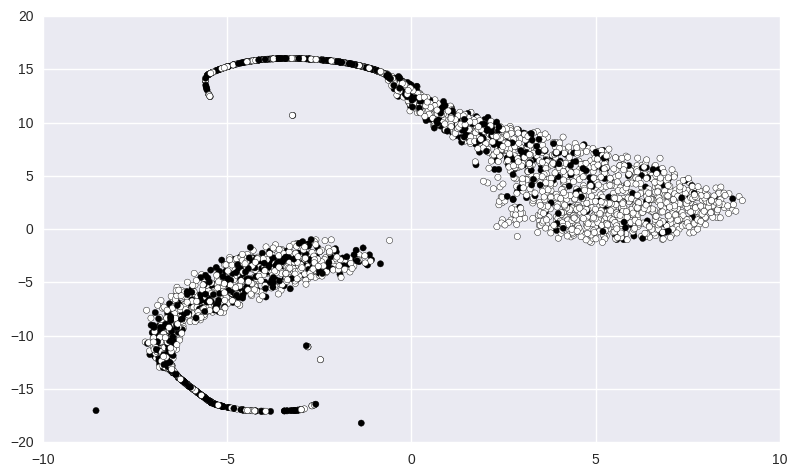

3


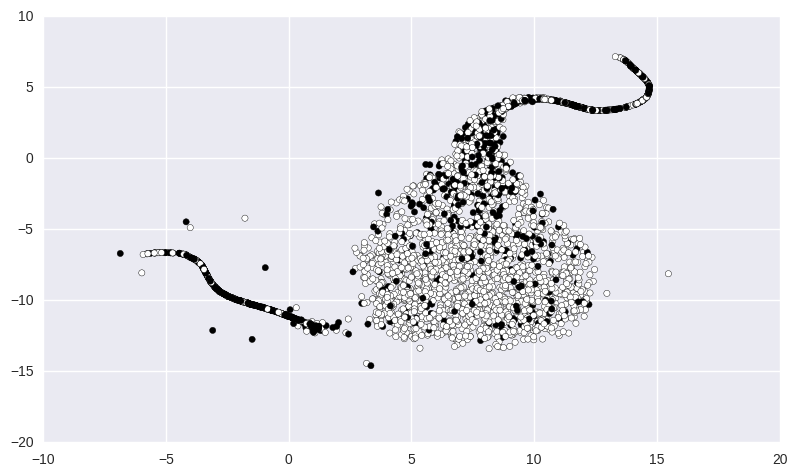

5


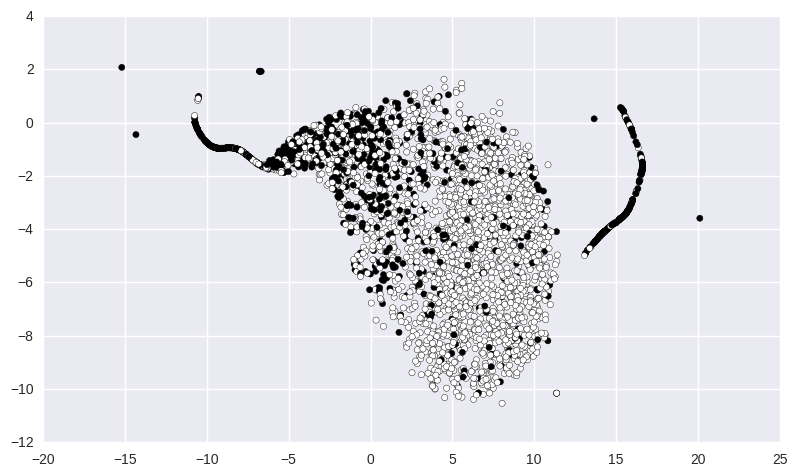

7


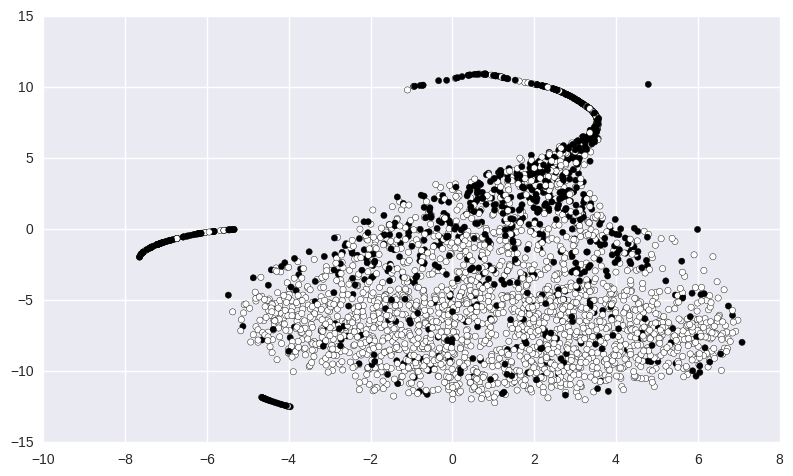

9


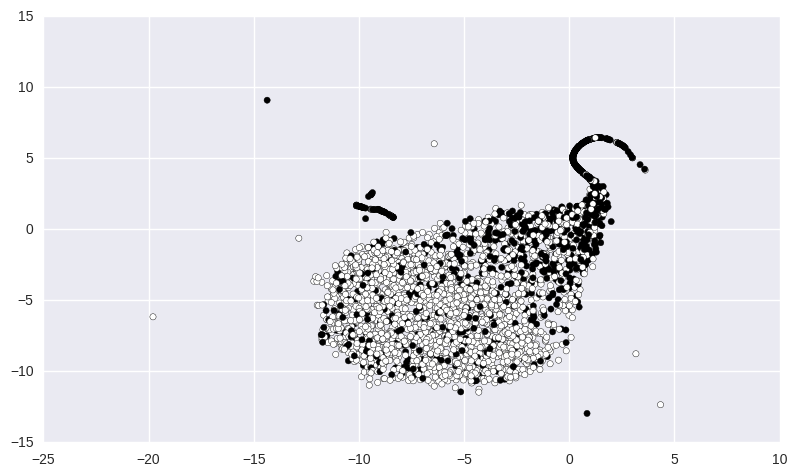

11


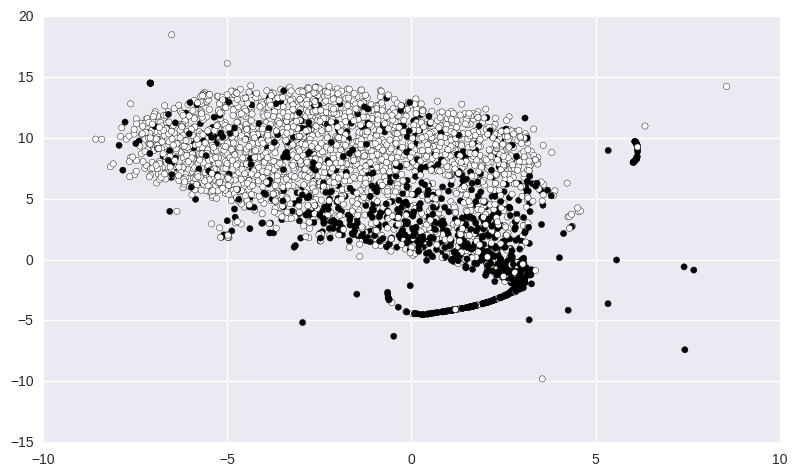

13


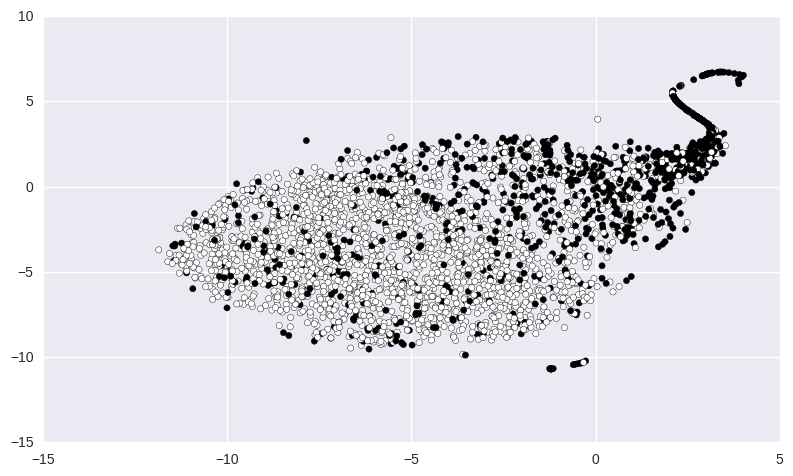

15


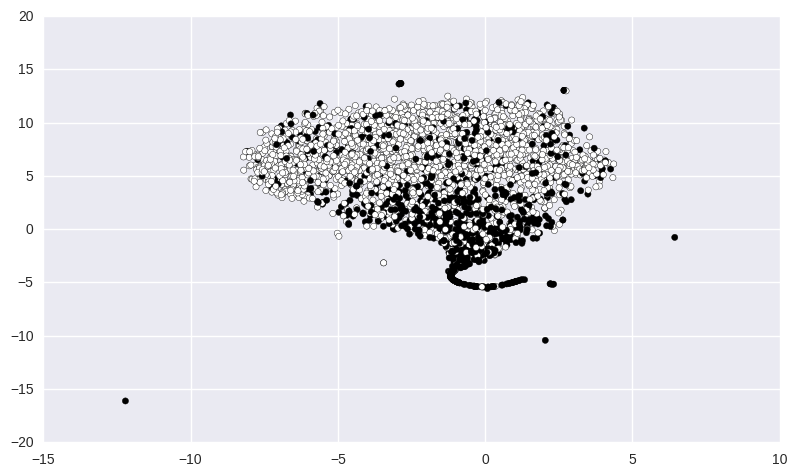

17


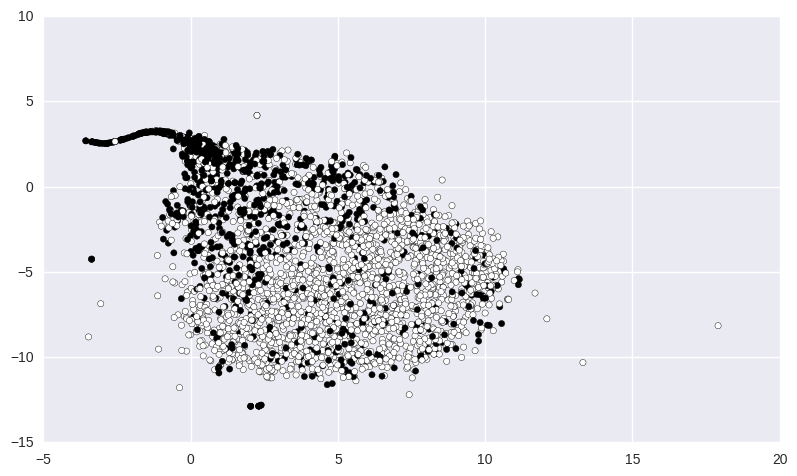

19


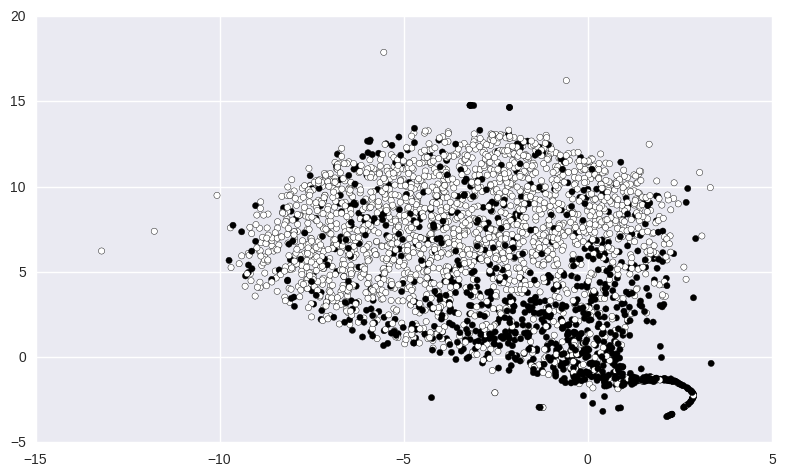

In [3]:
np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns', 500)

for j in range(1,21,2):
    print j
    sim_id=0
    columns = ['Time', 'Lyapunov Time']
    for i in ['1', '2', '3']:
        columns += ['a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i]

    filename = './output'+str(sim_id)+'.csv'
    df = pd.read_csv(filename, names=columns, skiprows=(j*100-1), nrows=1)
    df['Sim_ID']= sim_id
    df=pd.merge(df, stabilityindex, left_on = 'Sim_ID', right_on = 'Sim_ID')

    
    #df.drop(['Lyapunov Time','Time'], inplace=True, axis=1)

#4603
    for sim_id in range(1,4603):
        filename = './output'+str(sim_id)+'.csv'
        df2 = pd.read_csv(filename, names=columns, skiprows=j*100-1, nrows=1)
        df2['Sim_ID']= sim_id
        df2=pd.merge(df2, stabilityindex, left_on = 'Sim_ID', right_on = 'Sim_ID')
        df=pd.concat([df,df2], axis=0)
        
    dfintegral=df.copy()       
    tag=df[['Lyapunov Time','Time','Sim_ID','Stable']]
    tag = tag.as_matrix()
    df.drop(['Time','Sim_ID','Stable'], inplace=True, axis=1)
    df.replace(np.inf, 1e7)
    df['Lyapunov Time'].replace(np.inf, 1e7, inplace=True)
    df['Lyapunov Time'].replace('NaN', 1e7, inplace=True)
    df['Lyapunov Time'].fillna(1e7,inplace=True)
#    df.drop(['Lyapunov Time'], inplace=True, axis=1)


    #----------------------------------------------------------------------

    #init='pca',
#    tsvd= decomposition.TruncatedSVD(n_components=20, algorithm='arpack', random_state=None, tol=0.0)
#    X_tsvd = tsvd.fit_transform(df)

#    tsne = manifold.TSNE(n_components=2,init='random' ,perplexity=30.0,n_iter=1000 ,learning_rate=1000.0, random_state=0)
    tsne = manifold.TSNE(n_components=2,init='random' ,perplexity=370.0,n_iter=5000,learning_rate=5000.0, random_state=0)
    t0 = time()
    X_tsne = tsne.fit_transform(df)
#    print np.shape(tag), np.shape(X_tsne)

    X_tsne=np.concatenate((X_tsne, tag), axis=1)
    plt.scatter(X_tsne[:,0],X_tsne[:,1],c=X_tsne[:,5])
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(9.5, 5.5)
    plt.show()   
#    fig.savefig('no-chaos-perp30-lr1000.pdf', format='pdf')
    fig.savefig('./plot/output'+str(j*100)+'.png', format='png')


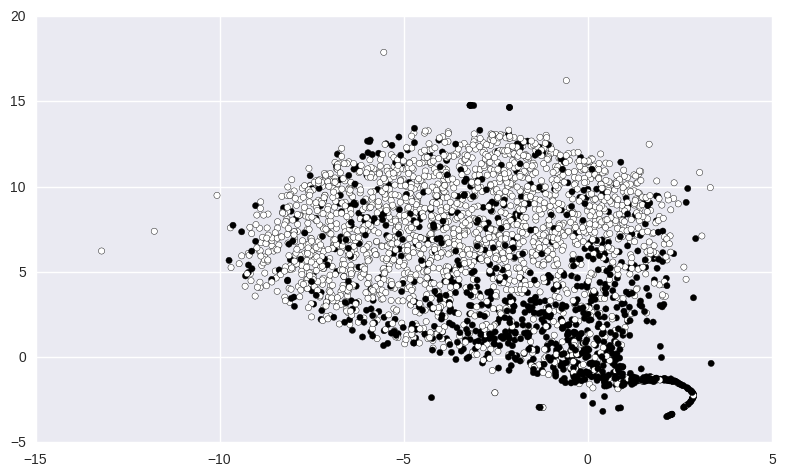

In [4]:
    %matplotlib inline
    plt.scatter(X_tsne[:,0],X_tsne[:,1],c=X_tsne[:,5])
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(9.5, 5.5)
    plt.show()   
fig.savefig('no-chaos-perp30-lr1000.pdf', format='pdf')




#    ax.savefig('./plot/output'+str(j*100)+'.png', format='png')
 
    
#fig = pylab.figure()
#ax = Axes3D(fig)
#ax.scatter(X_tsne[:,0],X_tsne[:,1],X_tsne[:,2],c=X_tsne[:,6])
#plt.show()
#ax.view_init(10, 10) 
    




In [5]:
    snake1index=pd.DataFrame(X_tsne[:,4][(X_tsne[:,0] >= 10) & (X_tsne[:,1] >= 8) ])
    snake1index.columns = ['Sim_ID']
    snakedataframe=dfintegral[dfintegral.Sim_ID.isin(snake1index['Sim_ID'])]
    snakedataframe=snakedataframe[snakedataframe['Stable'] == True]

    ratio1=snakedataframe['P3']/snakedataframe['P2']
    ratio2=snakedataframe['P3']/snakedataframe['P1']
    ratio3=snakedataframe['P2']/snakedataframe['P1']
    print ratio1,ratio2,ratio3

Series([], dtype: float64) Series([], dtype: float64) Series([], dtype: float64)


In [6]:
features = []
features += ['daOverRH1', 'daOverRH2']
features += ['mindaOverRH', 'maxdaOverRH']
#features += ['daOvera1', 'daOvera2']
#features += ['mindaOvera', 'maxdaOvera']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
#features += ['norm_std_e1', 'norm_max_e1', 'norm_std_window10_e1', 'norm_max_window10_e1']
#features += ['norm_std_e2', 'norm_max_e2', 'norm_std_window10_e2', 'norm_max_window10_e2']
#features += ['norm_std_e3', 'norm_max_e3', 'norm_std_window10_e3', 'norm_max_window10_e3']
#features += ['avg_eH1', 'std_eH1', 'max_eH1', 'min_eH1']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
#features += ['avg_eH2', 'std_eH2', 'max_eH2', 'min_eH2']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
#features += ['avg_eH3', 'std_eH3', 'max_eH3', 'min_eH3']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
#features += ['norm_std_inc1', 'norm_max_inc1', 'norm_std_window10_inc1', 'norm_max_window10_inc1']
#features += ['norm_std_inc2', 'norm_max_inc2', 'norm_std_window10_inc2', 'norm_max_window10_inc2']
#features += ['norm_std_inc3', 'norm_max_inc3', 'norm_std_window10_inc3', 'norm_max_window10_inc3']
#features += ['std_iH1', 'max_iH1', 'min_iH1']
#features += ['std_iH2', 'max_iH2', 'min_iH2']
#features += ['std_iH3', 'max_iH3', 'min_iH3']
#features += ['mean_std_iH']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['norm_LyapunovTime']

y = newfeatures['Stable']
X = newfeatures[features]
X.drop(['norm_LyapunovTime'], inplace=True, axis=1)
#X['norm_LyapunovTime'].replace(np.inf, 1e7, inplace=True)
#X['norm_LyapunovTime'].replace('NaN', 1e7, inplace=True)
#X['norm_LyapunovTime'].fillna(1e7,inplace=True)
#pd.set_option('display.max_rows', 5000)

#print X.shape()


/home/mad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#tsvd= decomposition.TruncatedSVD(n_components=20, algorithm='arpack', random_state=None, tol=0.0)
#X_tsvd = tsvd.fit_transform(X)

tsne = manifold.TSNE(n_components=2,init='random' ,perplexity=370.0,n_iter=5000,learning_rate=5000.0, random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)    
tag = newfeatures[['Stable']].as_matrix()
X_tsne=np.concatenate((X_tsne, tag), axis=1)

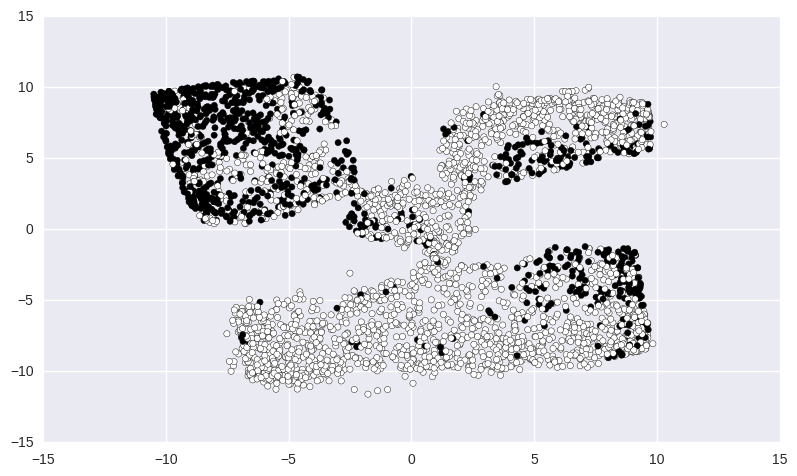

In [8]:
#%matplotlib notebook    
%matplotlib inline    

fig = pylab.figure()
#ax = Axes3D(fig)
#ax.scatter(X_tsne[:,0],X_tsne[:,1],X_tsne[:,2],c=X_tsne[:,3])
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=X_tsne[:,2])
fig.set_size_inches(9.5, 5.5)
plt.show()   
#    fig.savefig('no-chaos-perp30-lr1000.pdf', format='pdf')
fig.savefig('./plot/output'+str(100)+'.png', format='png')

#ax.view_init(200, 300) 
    

In [9]:
%matplotlib inline

for filtin in range(-20,20,1):
    flitsup=filtin+1
    flitsup=flitsup/2.
    filtin=filtin/2.
    
    print filtin,flitsup
    X_tsnefilter=X_tsne[((X_tsne[:,2]>=filtin)&(X_tsne[:,2]<=flitsup))]
    plt.scatter(X_tsnefilter[:,0],X_tsnefilter[:,1],c=X_tsnefilter[:,3])
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(9.5, 5.5)
    plt.show()   


#    ax.savefig('./plot/output'+str(j*100)+'.png', format='png')
 
#%matplotlib notebook    
#fig = pylab.figure()
#ax = Axes3D(fig)
#ax.scatter(X_tsne[:,0],X_tsne[:,1],X_tsne[:,2],c=X_tsne[:,3])
#ax.scatter(X_tsne[:,0],X_tsne[:,1],c=X_tsne[:,2])
#plt.show()
#ax.view_init(200, 300) 
    

-10.0 -9.5


IndexError: index 3 is out of bounds for axis 1 with size 3